Saving marketing_campaign.csv to marketing_campaign (4).csv
Initial Data Sample:
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   Ac

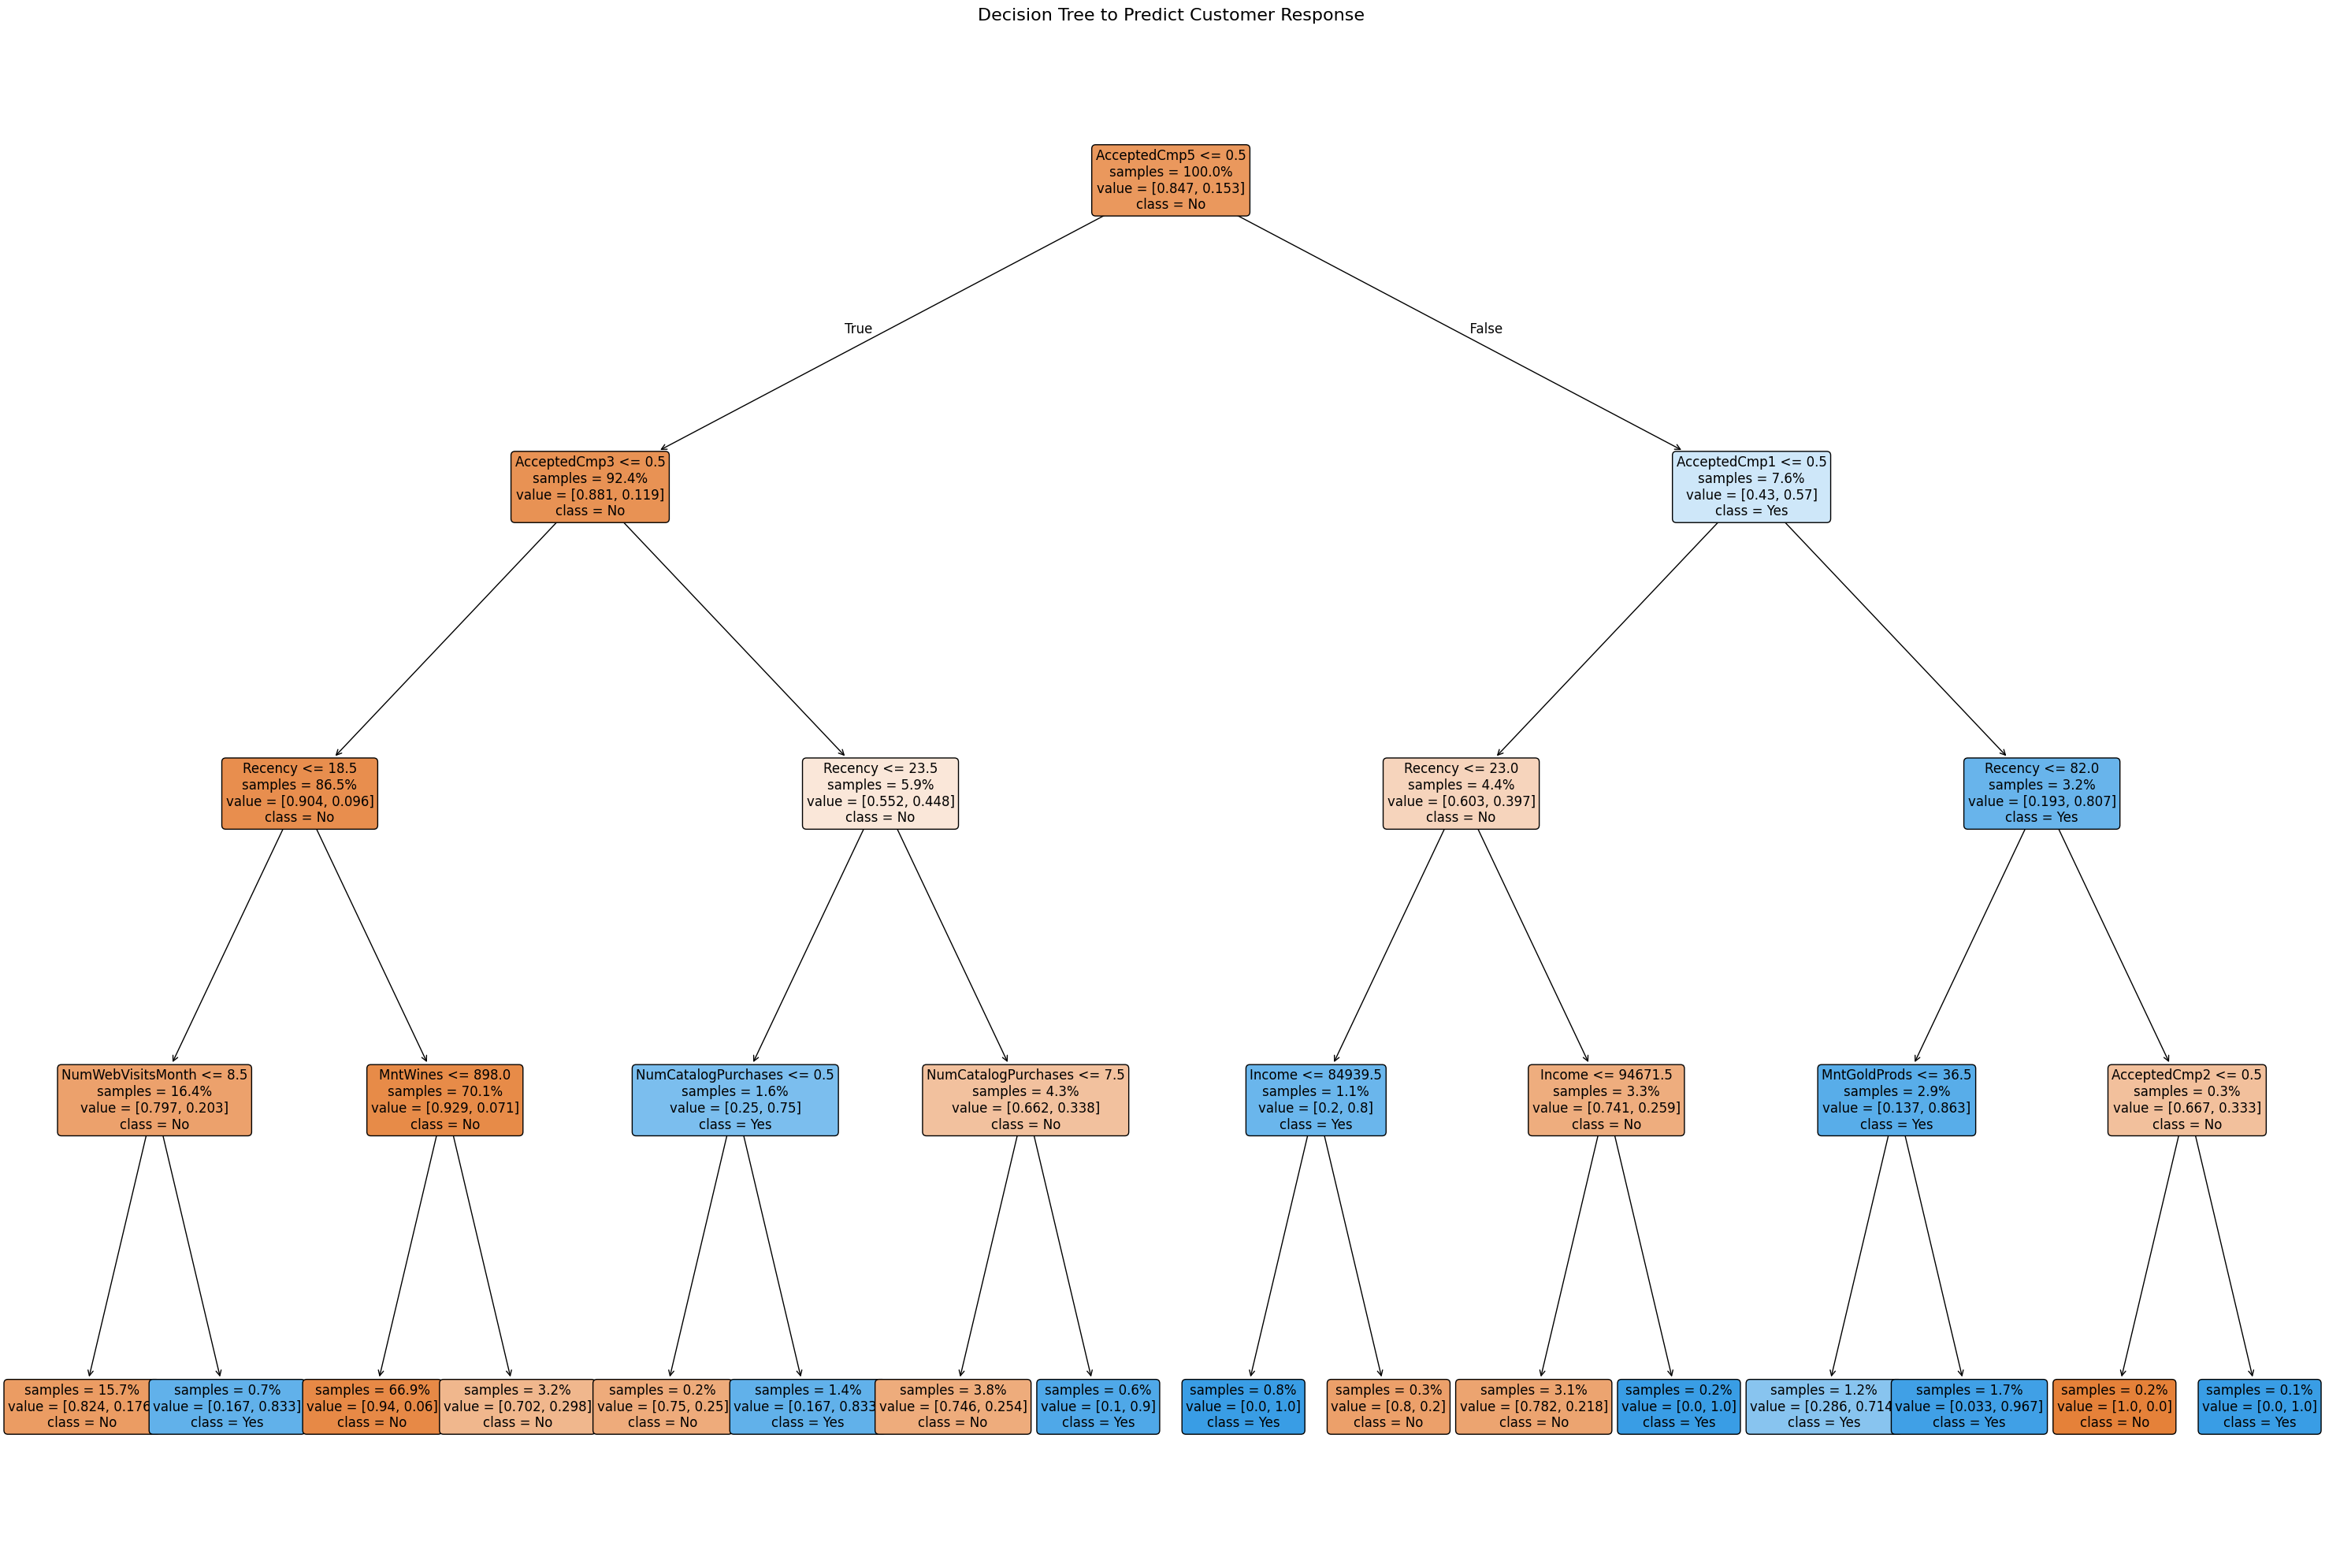


Textual Decision Rules:
|--- AcceptedCmp5 <= 0.50
|   |--- AcceptedCmp3 <= 0.50
|   |   |--- Recency <= 18.50
|   |   |   |--- NumWebVisitsMonth <= 8.50
|   |   |   |   |--- class: 0
|   |   |   |--- NumWebVisitsMonth >  8.50
|   |   |   |   |--- class: 1
|   |   |--- Recency >  18.50
|   |   |   |--- MntWines <= 898.00
|   |   |   |   |--- class: 0
|   |   |   |--- MntWines >  898.00
|   |   |   |   |--- class: 0
|   |--- AcceptedCmp3 >  0.50
|   |   |--- Recency <= 23.50
|   |   |   |--- NumCatalogPurchases <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- NumCatalogPurchases >  0.50
|   |   |   |   |--- class: 1
|   |   |--- Recency >  23.50
|   |   |   |--- NumCatalogPurchases <= 7.50
|   |   |   |   |--- class: 0
|   |   |   |--- NumCatalogPurchases >  7.50
|   |   |   |   |--- class: 1
|--- AcceptedCmp5 >  0.50
|   |--- AcceptedCmp1 <= 0.50
|   |   |--- Recency <= 23.00
|   |   |   |--- Income <= 84939.50
|   |   |   |   |--- class: 1
|   |   |   |--- Income >  84939.50
|  

In [6]:
# --- Install Required Libraries ---
!pip install pandas scikit-learn matplotlib seaborn --quiet

# --- Upload the Dataset ---
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()
filename = list(uploaded.keys())[0]  # Get the uploaded filename
df = pd.read_csv(io.BytesIO(uploaded[filename]), sep='\t')
print("Initial Data Sample:")
print(df.head())


# --- Preprocessing ---
# Drop ID and date columns
df = df.drop(columns=['ID', 'Dt_Customer'])

# Drop missing values
df = df.dropna()

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder

for col in df.select_dtypes(include='object'):
    df[col] = LabelEncoder().fit_transform(df[col])

# Define features (X) and target (y)
X = df.drop(columns='Response')
y = df['Response']

# --- Train-Test Split ---
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Train Decision Tree Model ---
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# --- Evaluate Model ---
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

# --- Visualize the Decision Tree (Clear and Fully Visible) ---
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 20))  # Bigger size for better clarity
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True,
    fontsize=12,
    impurity=False,
    proportion=True
)
plt.title("Decision Tree to Predict Customer Response", fontsize=16)
plt.tight_layout()
plt.show()

# --- Textual Decision Rules ---
from sklearn.tree import export_text

tree_rules = export_text(clf, feature_names=list(X.columns))
print("\nTextual Decision Rules:")
print(tree_rules)

